#ITRO

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/bitcoin_price.csv',
                 )

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [34]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.set_index('Date',inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [35]:
#select the bitcoin data for 2021

df.loc['2021-11-9']

,2021-11-09
Open,6.754973e+04
High,6.853034e+04
Low,6.638206e+04
Close,6.697183e+04
Adj Close,6.697183e+04
Volume,4.235799e+10


In [36]:
df1 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/bitcoin_price.csv',index_col='Date',parse_dates=True
                 )

In [37]:
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [38]:
#Resampling and calculating the mean closing price

# df1.resample('M').mean()
df1.resample('W').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


#Exploring the data

7 day rolling average of closing price

In [39]:
df1['7_day_rolling']=df1['Close'].rolling(window=7).mean()

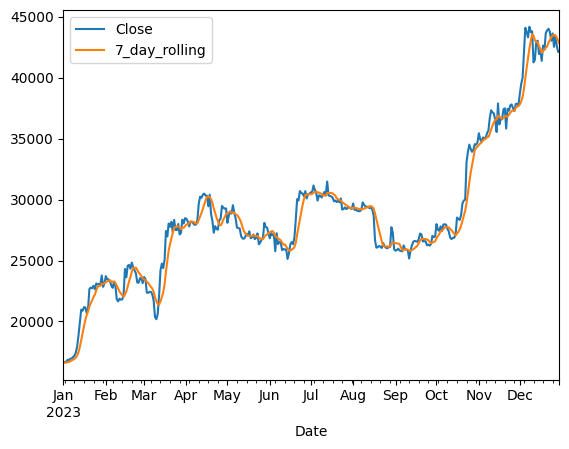

In [40]:

df1[['Close','7_day_rolling']].loc['2023'].plot()
plt.show()

In [41]:
#Find out the highest average month

df1.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [42]:
#calculate daily returns

df1['daily_returns']=df1['Close'].pct_change() *100

df1['daily_returns']

,daily_returns
Date,
2014-09-17,NaN
2014-09-18,-7.192558
2014-09-19,-6.984265
2014-09-20,3.573492
2014-09-21,-2.465854
...,...
2023-12-26,-2.505525
2023-12-27,2.169436
2023-12-28,-1.876028


In [43]:
# Days with more than 10% change in closing price

df1[abs(df1['daily_returns'])>10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


Data Visualization

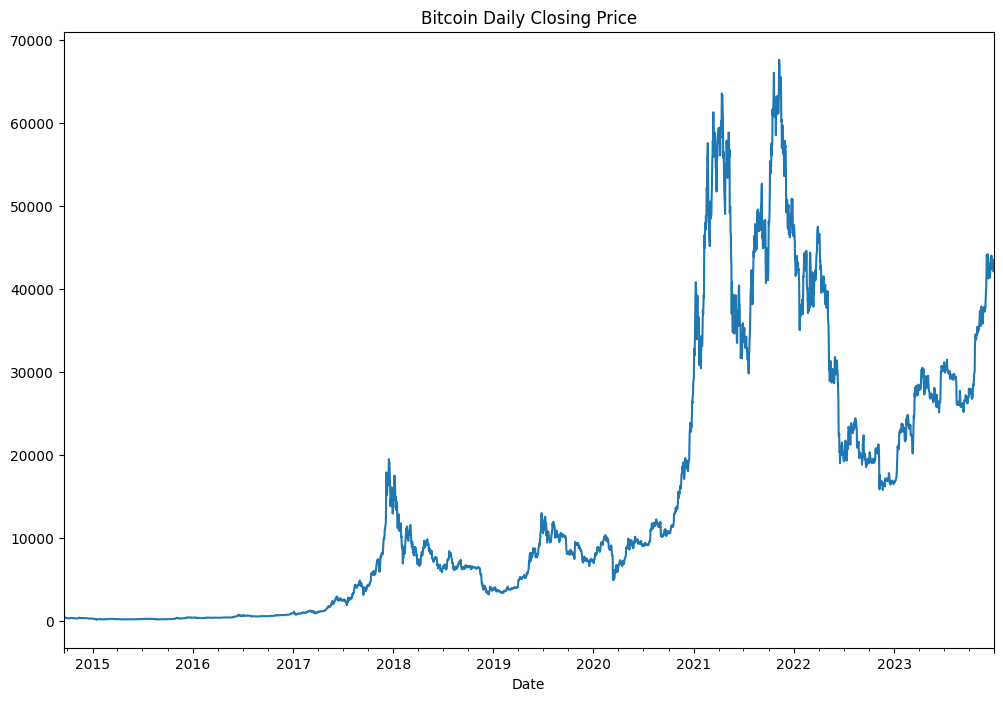

In [44]:
df1['Close'].plot(figsize=(12,8))
plt.title('Bitcoin Daily Closing Price')
plt.show()

/tmp/ipython-input-3545042304.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df1.resample('Y').sum()['Volume'].plot()


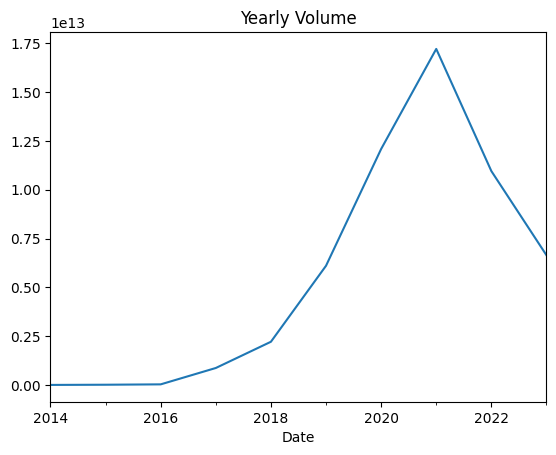

In [45]:
#Plot the yearly volume

df1.resample('Y').sum()['Volume'].plot()
plt.title('Yearly Volume')
plt.show()

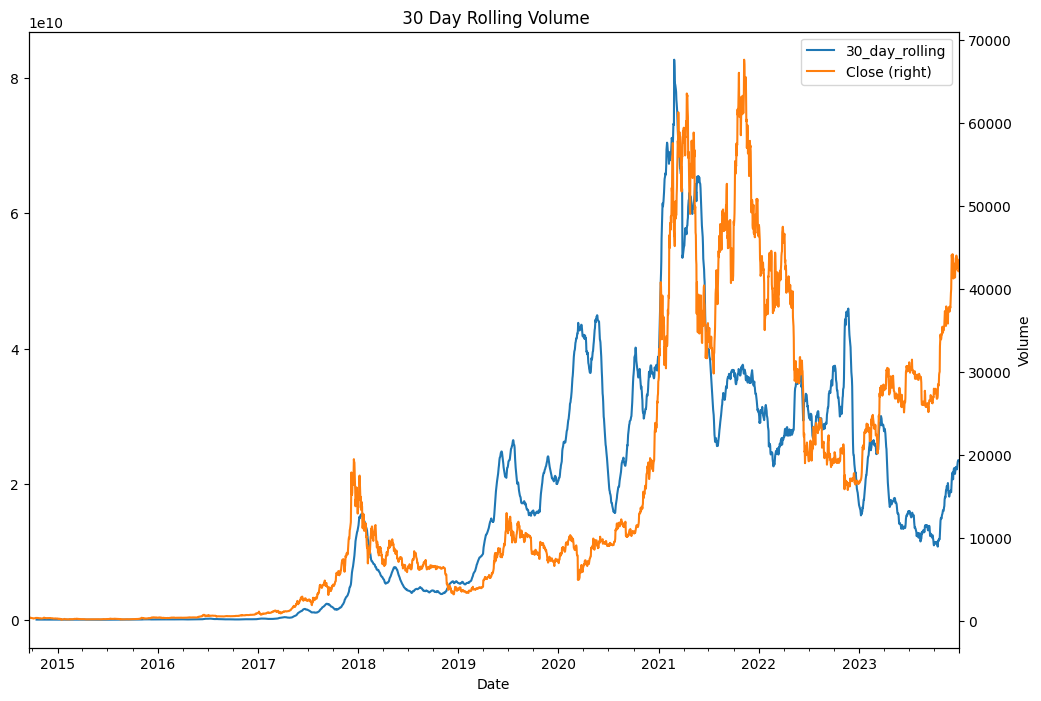

In [46]:
#plot closing price and 30 day rolling volume

df1['30_day_rolling']=df1['Volume'].rolling(window=30).mean()

df1[['30_day_rolling']].plot(figsize=(12,8),legend=True)
plt.title(' 30 Day Rolling Volume')
ax =df['Close'].plot(secondary_y=True,legend=True)
ax.set_ylabel('Volume')
plt.show()

corrolation between 30 day rolling volume  and the closing price


In [47]:
df1[['Close','30_day_rolling']].corr()   #seems positively correlated

,Close,30_day_rolling
Close,1.000000,0.750445
30_day_rolling,0.750445,1.000000


Data Manupilation

In [48]:
#identify missing values

df1.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_rolling,6
daily_returns,1
30_day_rolling,29


In [49]:
df1['30_day_rolling']=df1['30_day_rolling'].bfill()

In [50]:
df1['30_day_rolling']


,30_day_rolling
Date,
2014-09-17,3.624856e+07
2014-09-18,3.624856e+07
2014-09-19,3.624856e+07
2014-09-20,3.624856e+07
2014-09-21,3.624856e+07
...,...
2023-12-26,2.315280e+10
2023-12-27,2.336140e+10
2023-12-28,2.340460e+10


In [51]:
df1.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_rolling,6
daily_returns,1
30_day_rolling,0


In [55]:
#Interpolate 7_day_rolling
df1['7_day_rolling'].interpolate(inplace=True)

In [56]:

df1['7_day_rolling']

,7_day_rolling
Date,
2014-09-17,NaN
2014-09-18,NaN
2014-09-19,NaN
2014-09-20,NaN
2014-09-21,NaN
...,...
2023-12-26,43486.929688
2023-12-27,43457.016183
2023-12-28,43279.688058


In [57]:
df1.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_rolling,6
daily_returns,1
30_day_rolling,0


In [62]:
#Extract Time Variable

df1['Year']=df1.index.year
df1['Month']=df1.index.month
df1['Day']=df1.index.day
df1['Weekday']=df1.index.day_name()
df1['Weekday_numeric']=df1.index.weekday
# df1['DayName']=df1.index.day_name()
df1['is_weekend']=df1.index.weekday>4

df1.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling,Year,Month,Day,Weekday,Weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,6,True


In [69]:
#Feature Engineering | lagged values

df1['Closed_lag1']=df1['Close'].shift(1)
df1['Closed_lag2']=df1['Close'].shift(2)
# df1['Closed_lag3']=df1['Close'].shift(3)

In [70]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling,Year,Month,Day,Weekday,Weekday_numeric,is_weekend,Closed_lag1,Closed_lag2
Date,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,4,False,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,6,True,408.903992,394.795990


#Seasonality

In [98]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf

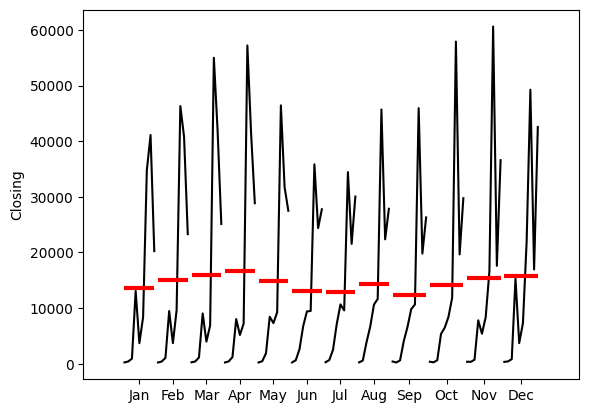

In [75]:
#plotting the monthly seasonality

month_plot(df1['Close'].resample('ME').mean(),ylabel='Closing')

plt.show()

/tmp/ipython-input-567415039.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df1['Close'].resample('Q').mean(),ylabel='Closing')


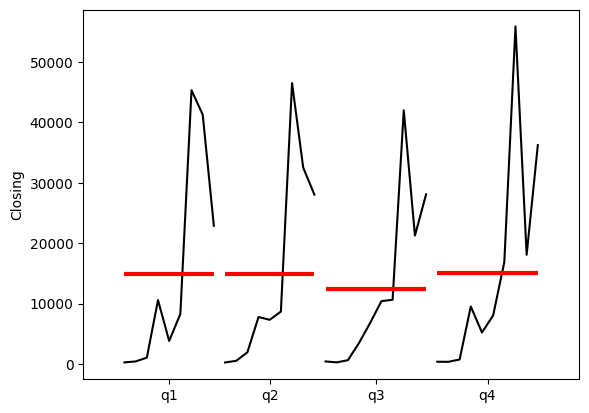

In [76]:
#plotting the quaterly seasonality

quarter_plot(df1['Close'].resample('Q').mean(),ylabel='Closing')

plt.show()

#load new data

In [82]:
choco = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/choco_monthly_revenue.csv",index_col=0,parse_dates=True)

In [83]:
choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


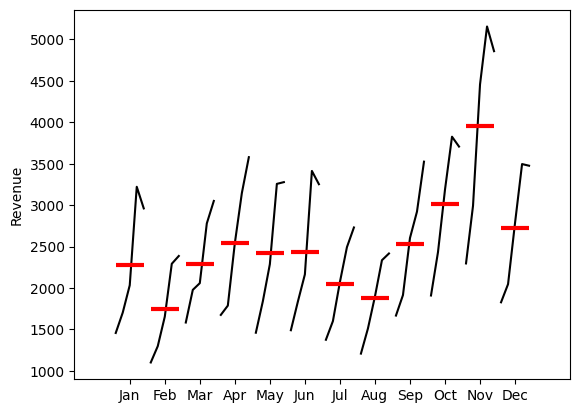

In [86]:
month_plot(choco['revenue'],ylabel='Revenue')

plt.show()

/tmp/ipython-input-4219902720.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(choco['revenue'].resample('Q').mean(),ylabel='Revenue')


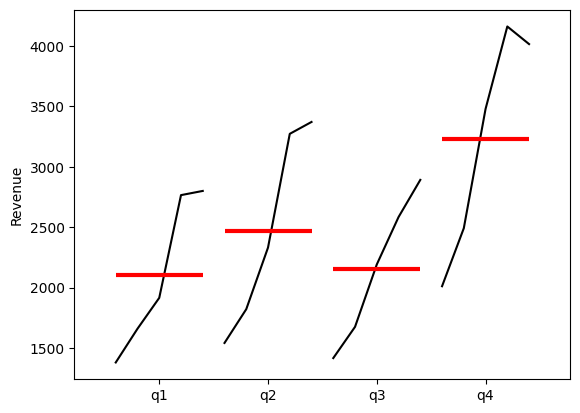

In [88]:
quarter_plot(choco['revenue'].resample('Q').mean(),ylabel='Revenue')

plt.show()

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

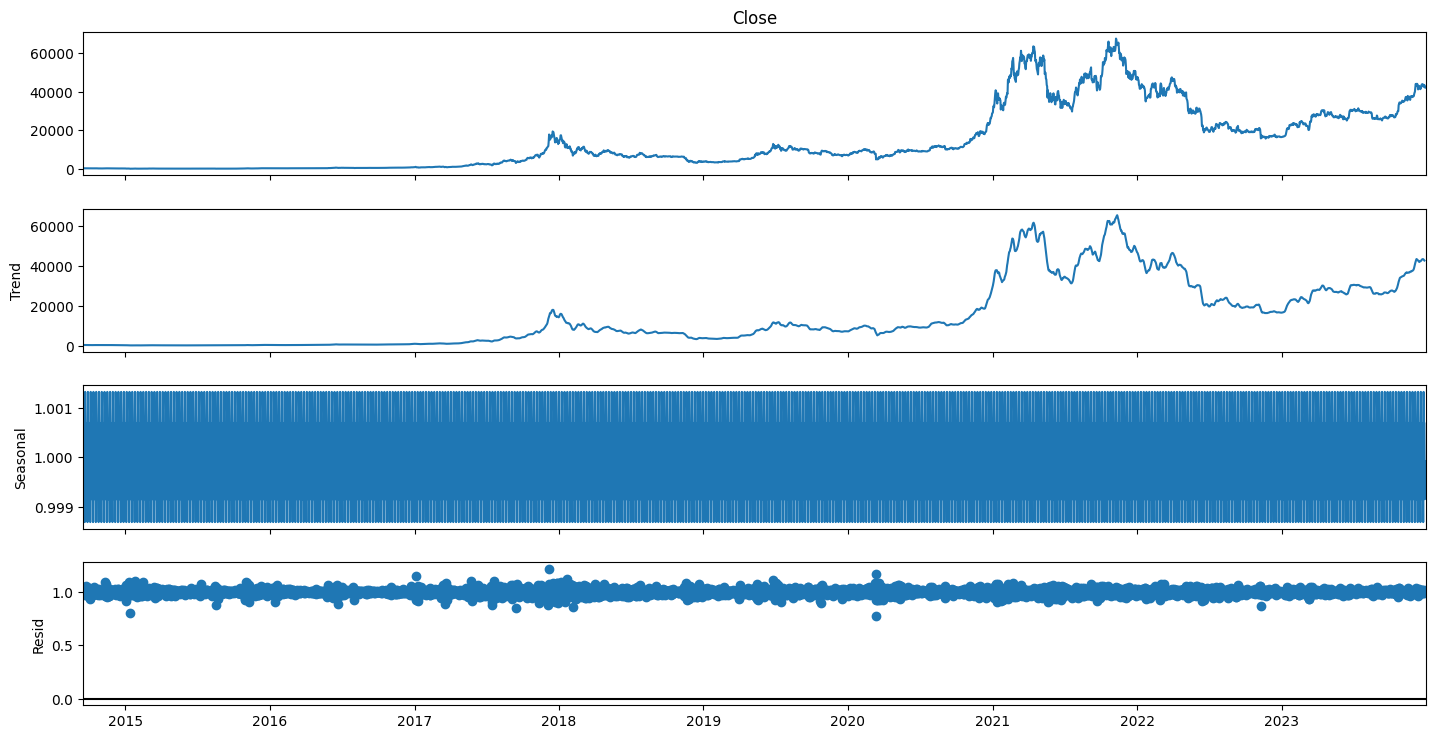

In [94]:
#seasonal decompostion plot for bitcoin data

decomposition =seasonal_decompose(df1['Close'],model='multiplicative',period=7)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

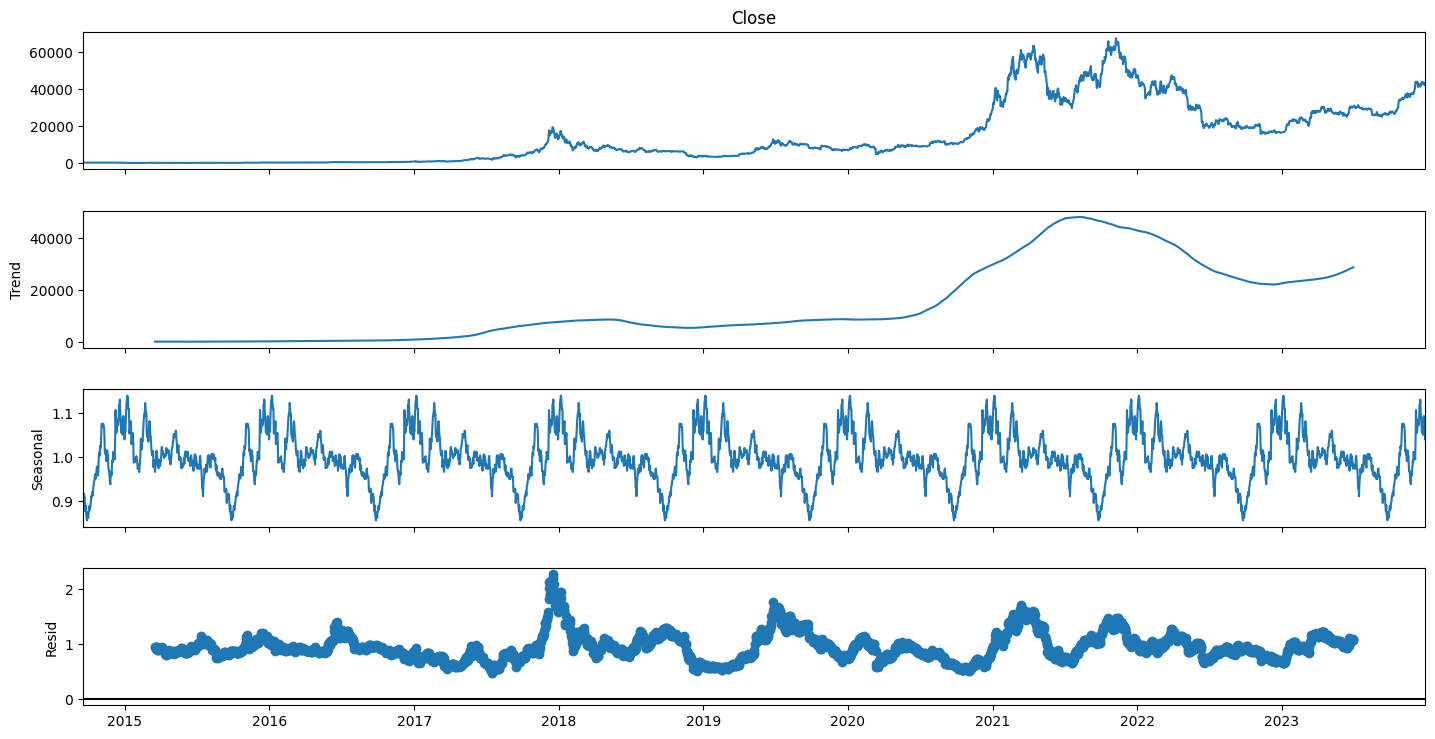

In [91]:
#seasonal decompostion plot for bitcoin data

decomposition =seasonal_decompose(df1['Close'],model='multiplicative',period=365)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

In [93]:
# decomposition =seasonal_decompose(df1['Close'],model='additive',period=365)

# fig =decomposition.plot()

# fig.set_size_inches(16,8)
# plt.show()

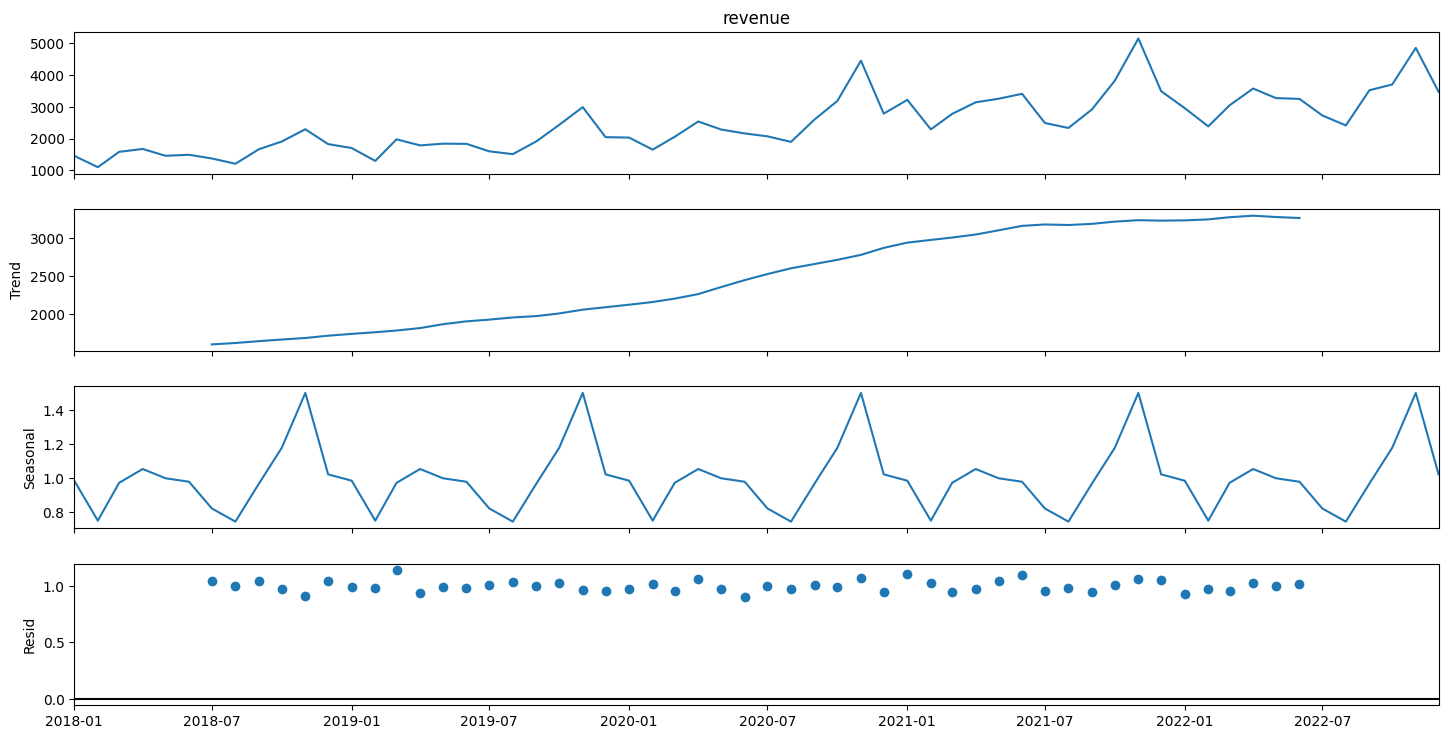

In [97]:
#seasonal decompostion plot for choco revenue

decomposition =seasonal_decompose(choco['revenue'],model='multiplicative',period=12)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

Sesonality:

* 24 for hourly
* 7 or 365 for daily but 7 is preferred for modeling
* 52 for weekly
* 12 for yearly
* 4 for quaterly

* 5 for weekdays

Auto Correlation

In [99]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf

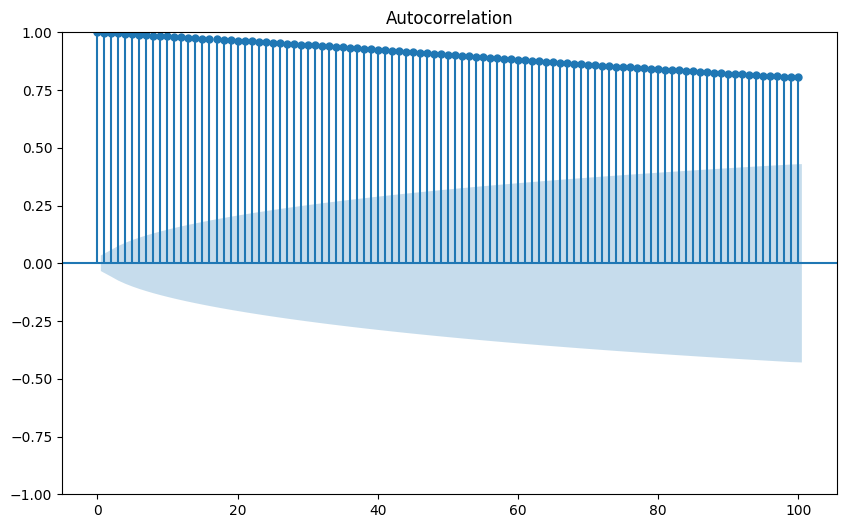

In [100]:
#Plot the autocorrelation (ACF)  bitcoin data

fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df1['Close'],lags=100,ax=ax)
plt.show()

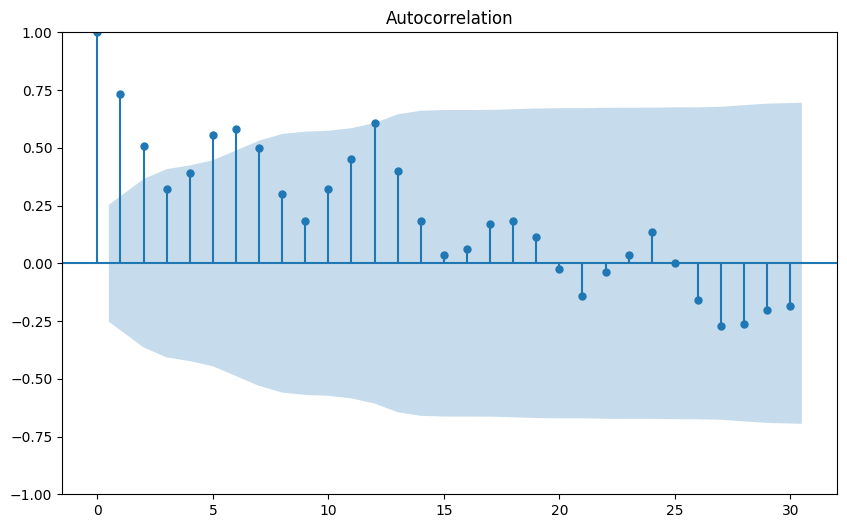

In [102]:
#Plot the autocorrelation (ACF)  choco data

fig,ax = plt.subplots(figsize=(10,6))
plot_acf(choco['revenue'],lags=30,ax=ax)
plt.show()

In [103]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_pacf

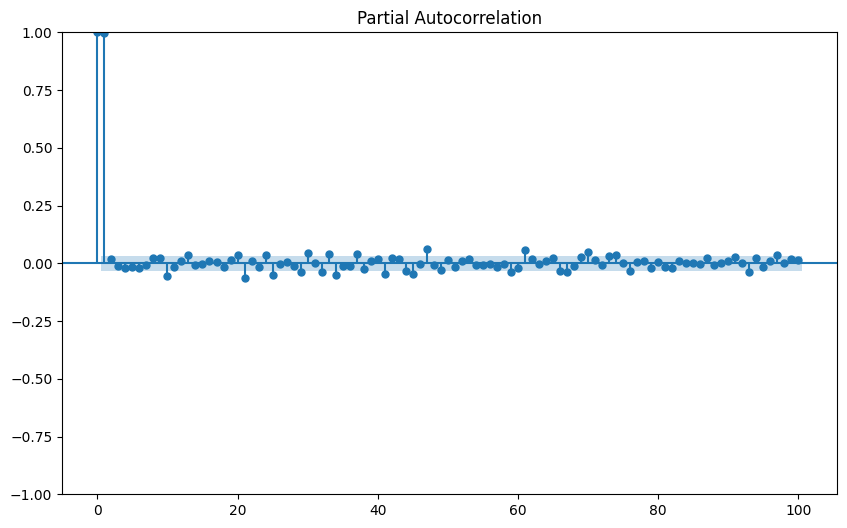

In [108]:
#Plot the partial autocorrelation (PACF)  bitcoin data

fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df1['Close'],lags=100,ax=ax)
plt.show()

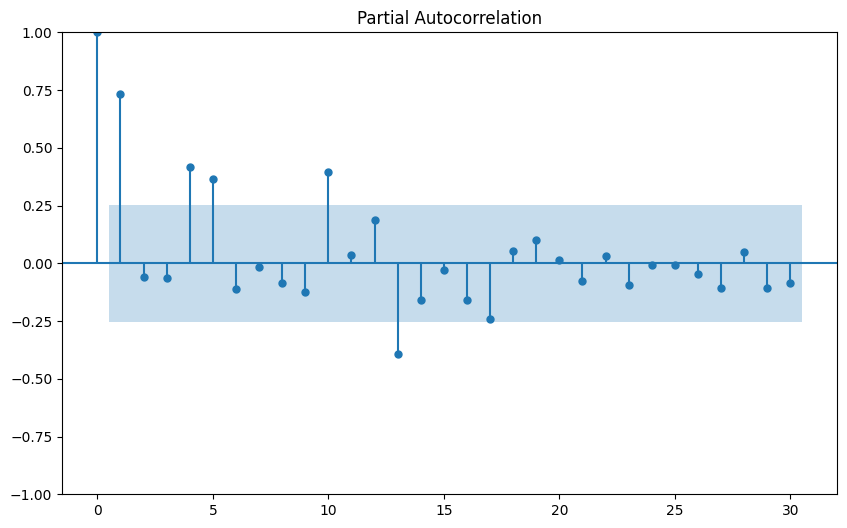

In [107]:
#Plot the partial autocorrelation (PACF)  choco data

fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(choco['revenue'],lags=30,ax=ax)
plt.show()

#Useful code Template

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [112]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_pacf


Data Loading

In [110]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/bitcoin_price.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df['Close'].plot(figsize=(12,8))
plt.title('Bitcoin Daily Closing Price')
plt.show()

In [ ]:
#plotting the monthly seasonality

month_plot(df['Close'].resample('ME').mean(),ylabel='Closing')

plt.show()

In [ ]:
#plotting the quaterly seasonality

quarter_plot(df['Close'].resample('Q').mean(),ylabel='Closing')

plt.show()

In [ ]:
#seasonal decompostion plot for bitcoin data

decomposition =seasonal_decompose(df['Close'],model='multiplicative',period=7)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

In [ ]:
#Plot the autocorrelation (ACF)  bitcoin data

fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df['Close'],lags=100,ax=ax)
plt.show()

In [ ]:
#Plot the partial autocorrelation (PACF)  bitcoin data

fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df1['Close'],lags=100,ax=ax)
plt.show()

#new